# Import Modules

In [1]:
import pandas as pd
import requests
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt

# Gathering Data for Project
1. twitter-archive-enhanced.csv downloaded directly from resources section
2. image_predictions.tsv downloaded programatically
3. Getting each tweet's retweet count and favorite ("like"). Any Additional data as required

## image_Predictions.tsv file downloaded programatically

In [2]:
# image_predictions.tsv downloaded programatically as below.
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_predictions_url)
with open(image_predictions_url.split('/')[-1],mode='wb') as image_pred_file:
    image_pred_file.write(response.content)

## Created Dataframes for twitter archive and image_predictions file

In [3]:
# Creating the Dataframes for both the file: twitter-archive-enhanced.csv and image-predictions.tsv.
# Dataframe for twitter archive file will be used to read tweet_id for extracting data in next step.
Archive_Dataframe = pd.read_csv('twitter-archive-enhanced.csv')
Prediction_Dataframe = pd.read_csv('image-predictions.tsv',sep='\t')

## Extract data from Twitter through tweet_id in twitter_enhanced file

In [9]:
# Authorising Tweeter Developers account and creating object to fetch data through JSON
consumer_key = 'KKB3iIPm1z26JtkVk3811z1Cv'
consumer_secret = 'hXTD37duMocS1FJj1zWXpnmDA6bJSGsDmqQeZWRRpT0dBNVmsm'
access_token = '1241974341513822209-uJJZF7ZRObCHB4zlGAL5Mk9JXreFSq'
access_secret = 'sdNFtDzSv1grNLCZlIMfJI1K29OpXrbp2JUuNkEBEZZkJ'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit = True,wait_on_rate_limit_notify = True)

## Running the loop to get ONLY the entire JSON data for each and every Tweeter ID's in Archive Dataframe into tweet_json.txt
df_tweet_json = []
df_Not_Found_tweetID = []

for tweet_id in Archive_Dataframe.tweet_id:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        df_tweet_json.append(tweet._json)
    except tweepy.TweepError as e:
        df_Not_Found_tweetID.append(tweet_id)

## Formating the data retrieved in JSON format and copying into tweet_json.txt file
format_json = []
for tweet_json in df_tweet_json:
    format_json.append(tweet_json)
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(format_json, indent=4))


NotFound_df = pd.DataFrame(df_Not_Found_tweetID)
NotFound_df.to_csv('Tweet_Not_found.txt', header=None, index=None, mode='a')

Rate limit reached. Sleeping for: 570
Rate limit reached. Sleeping for: 646


## Create Dataframe for Retweet 

In [4]:
retweet_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    
    for json_field in all_data:
        tweet_id = json_field['id']
        compl_tweet = json_field['full_text']
        https = compl_tweet[compl_tweet.find('https'):]
        retweet_count = json_field['retweet_count']
        favorite_count = json_field['favorite_count']
        retweeted_status = json_field['retweeted_status'] = json_field.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = https
        else:
            retweeted_status = 'retweet'
            url = 'retweet'
        
        retweet_list.append({'tweet_id':tweet_id,
                             'retweet_count':retweet_count,
                             'favorite_count':favorite_count,
                             'retweeted_status':retweeted_status,
                             'url':url
                            })
        
    retweet_Dataframe = pd.DataFrame(retweet_list, columns = ['tweet_id','retweet_count','favorite_count','retweeted_status','url'])

# Assessing Issues

## Quality Issues
### Visual Assessment
1. In Archive_Dataframe, drop rows having retweet_status_id
2. In Archive_Dataframe, timestamp is of object type. It should be timestamp type.
3. In Archive_Dataframe, source column needs to be cleaned to get the source of the twitter
4. In Prediction_Dataframe, Greatest of all predictions with TRUE value will be taken into one column
5. In Prediction_Dataframe, Prediction names are having _ hence remove it with space

#### < As per Review Comments mentioned below>
6. In Archive_Dataframe - tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be of Type Object rather int or float
7. In Archive Dataframe - rating_numerator and rating_denominator should be float Data type and extracted correctly from spreadsheet
8. In Archive Dataframe - dropping rows having lowercase names, still few names will come as unadvised but that is fine for now
9. In Retweet Dataframe - retweet_count and favorite count should be int, not float

### programmatic Assessment
10. In retweet_Dataframe, remove 163 retweets
11. In Archive_Dataframe, numerator values as 420, 143, 960, 666
12. In Archive_Dataframe, denominator values as 11, 2, 16, 15, 7, 0

#### < As per Review Comments moved below 2 points to Quality Issues from Tidiness Issues>
13. Unwanted columns in Archival_Dataframe needs to be removed.
14. Unwanted columns in Predictions_Dataframe need to be removed after we finalise Prediction and Confidence for each dog


## Tidiness Issues
1. Dog Stage / Dog Type columns should be re-structured into one columns to show the value in one.
2. Merge all the Dataframes into one to visualise

## Archive_Dataframe

In [5]:
# Testing Archive_Dataframe
Archive_Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
# Testing Archive_Dataframe
Archive_Dataframe.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
927,754856583969079297,NaN,NaN,2016-07-18 01:53:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She's not a fan of the fast mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754856583...,11,10,Winnie,None,None,None,None
1597,686050296934563840,NaN,NaN,2016-01-10 05:01:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flávio. He's a Macedonian Poppycock. 9...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686050296...,11,10,Flávio,None,None,None,None
1556,688828561667567616,NaN,NaN,2016-01-17 21:01:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Brad. His car probably has a spoi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688828561...,9,10,Brad,None,None,None,None
957,751538714308972544,NaN,NaN,2016-07-08 22:09:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Max. She has one ear that's always sli...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751538714...,10,10,Max,None,None,None,None
144,863907417377173506,NaN,NaN,2017-05-15 00:02:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's quite impressive at hide a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863907417...,13,10,Albus,None,None,None,None


In [7]:
# Testing Archive_Dataframe
Archive_Dataframe.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [8]:
# Checking for all the numerators which feels like incorrect. 
# Text will be analysed to assess whether to ignore or clean
print(Archive_Dataframe.text[Archive_Dataframe.rating_numerator == 420])
print(Archive_Dataframe.text[Archive_Dataframe.rating_numerator == 165])
print(Archive_Dataframe.text[Archive_Dataframe.rating_numerator == 144])
print(Archive_Dataframe.text[Archive_Dataframe.rating_numerator == 182])
print(Archive_Dataframe.text[Archive_Dataframe.rating_numerator == 143])
print(Archive_Dataframe.text[Archive_Dataframe.rating_numerator == 666])
print(Archive_Dataframe.text[Archive_Dataframe.rating_numerator == 960])
print(Archive_Dataframe.text[Archive_Dataframe.rating_numerator == 1776])
print(Archive_Dataframe.text[Archive_Dataframe.rating_numerator == 99])
print(Archive_Dataframe.text[Archive_Dataframe.rating_numerator == 121])
print(Archive_Dataframe.text[Archive_Dataframe.rating_numerator == 204])

188     @dhmontgomery We also gave snoop dogg a 420/10...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object
902    Why does this never happen at my front door......
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object
290    @markhoppus 182/10
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object
979    This is Atticus. He's quite simply America af....
Name: text, dtype: object
1228    Happy Saturday here's 9 puppers on a bench. 99...
Name: text, dtype: object
1635    Someone help the girl is being mugged. Several...
Name: text, dtype: object
1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object


In [9]:
# Full Text for numerator
print(Archive_Dataframe['text'][188]+' END') # should be cleaned as it was rated to snoop dog
print(Archive_Dataframe['text'][2074]+' END') # should be cleaned as it was rated to snoop dog
print(Archive_Dataframe['text'][902]+' END') # Ignoring it as data seems fine
print(Archive_Dataframe['text'][1779]+' END') # Ignoring it as data seems fine
print(Archive_Dataframe['text'][290]+' END') # No photo hence will be cleaned
print(Archive_Dataframe['text'][1634]+' END') # Ignoring it as data seems fine
print(Archive_Dataframe['text'][189]+' END') # No Picture hence will be cleaned
print(Archive_Dataframe['text'][313]+' END') # 13/10 is the valid rating rather 960/00 hence needs to be cleaned
print(Archive_Dataframe['text'][979]+' END') # Ignoring it as data seems fine
print(Archive_Dataframe['text'][1228]+' END') # Ignoring it as data seems fine
print(Archive_Dataframe['text'][1635]+' END') # Ignoring it as data seems fine
print(Archive_Dataframe['text'][1120]+' END') # Ignoring it as data seems fine

@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research END
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY END
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE END
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq END
@markhoppus 182/10 END
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3 END
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10 END
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho END
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh END
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1 END
Someone help the girl is being mugged. Several are distracting her while two steal her sh

In [10]:
Archive_Dataframe.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
# Denominator is allocted based upon the number of dogs with multiple of 10
# Suspicious denominators are those which are not multiple of 10
print(Archive_Dataframe.text[Archive_Dataframe.rating_denominator == 11])
print(Archive_Dataframe.text[Archive_Dataframe.rating_denominator == 2])
print(Archive_Dataframe.text[Archive_Dataframe.rating_denominator == 16])
print(Archive_Dataframe.text[Archive_Dataframe.rating_denominator == 15])
print(Archive_Dataframe.text[Archive_Dataframe.rating_denominator == 7])
print(Archive_Dataframe.text[Archive_Dataframe.rating_denominator == 0])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object


In [12]:
# Full text for denominator
print(Archive_Dataframe.text[784]+'END') # retweet, Correct denominator is 10 rather 11
print(Archive_Dataframe.text[1068]+'END') # Correct denominator is 10 rather 11
print(Archive_Dataframe.text[1662]+'END') # Correct denominator is 10 rather 11
print(Archive_Dataframe.text[2335]+'END') # Correct denominator is 10 rather 2
print(Archive_Dataframe.text[1663]+'END') # WeRateDogs professional detailing. It needs to be cleaned
print(Archive_Dataframe.text[342]+'END') # it seems as date hence will cleaned
print(Archive_Dataframe.text[516]+'END') # Does not seems to be in twitter anymore, needs to be cleaned
print(Archive_Dataframe.text[313]+'END') # Correct denominator is 10 rather 00

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…END
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQEND
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5END
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLvEND
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsibleEND
@docmisterio account started on 11/15/15END
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxxEND
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a

## Prediction_Dataframe

In [13]:
# Testing Prediction_Dataframe
Prediction_Dataframe.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
805,691756958957883396,https://pbs.twimg.com/media/CZmdSD8UcAAnY5R.jpg,1,Saint_Bernard,0.342571,True,boxer,0.289096,True,Pembroke,0.076463,True
604,679854723806179328,https://pbs.twimg.com/media/CW9UQ7oWkAAErmU.jpg,1,llama,0.887963,False,ram,0.095021,False,chow,0.002307,True
26,666373753744588802,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,1,soft-coated_wheaten_terrier,0.326467,True,Afghan_hound,0.259551,True,briard,0.206803,True
835,694183373896572928,https://pbs.twimg.com/media/CaI8Fn0WAAIrFJN.jpg,1,teddy,0.441499,False,Pekinese,0.080870,True,Shih-Tzu,0.072099,True
1121,726887082820554753,https://pbs.twimg.com/media/ChZr8SdWIAAVQKt.jpg,1,soft-coated_wheaten_terrier,0.515919,True,Irish_terrier,0.162655,True,Chesapeake_Bay_retriever,0.125182,True


In [14]:
Prediction_Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
Prediction_Dataframe.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

## retweet_Dataframe

In [16]:
# Testing retweet_Dataframe
# 1. Total Count came as 2331 as compared to 2356 in Archive_Dataframe. 25 are not found in tweeter API
retweet_Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id            2331 non-null int64
retweet_count       2331 non-null int64
favorite_count      2331 non-null int64
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(3), object(2)
memory usage: 91.1+ KB


In [17]:
retweet_Dataframe.tweet_id.duplicated().value_counts()

False    2331
Name: tweet_id, dtype: int64

In [18]:
# Need to drop retweets
sum(retweet_Dataframe.retweeted_status != 'Original tweet')

163

# Cleaning

In [19]:
Archive_Clean =  Archive_Dataframe.copy()
Prediction_Clean = Prediction_Dataframe.copy()
Retweet_Clean = retweet_Dataframe.copy()

# Quality Issues
## Define - tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be of Datatype Object. rating_numerator and rating_denominator should be of Datatype Float
## ** As per review comments **
## Coding

In [20]:
# Changing Datatypes of below columns to Object as per review comments
Archive_Clean.tweet_id = Archive_Clean.tweet_id.astype('object')
Archive_Clean.in_reply_to_status_id = Archive_Clean.in_reply_to_status_id.astype('object')
Archive_Clean.in_reply_to_user_id = Archive_Clean.in_reply_to_user_id.astype('object')
Archive_Clean.retweeted_status_id = Archive_Clean.retweeted_status_id.astype('object')
Archive_Clean.retweeted_status_user_id = Archive_Clean.retweeted_status_user_id.astype('object')

# Changing Datatypes of below columns to float64 as per review comments
Archive_Clean.rating_numerator = Archive_Clean.rating_numerator.astype('float64')
Archive_Clean.rating_denominator = Archive_Clean.rating_denominator.astype('float64')

## Testing

In [21]:
Archive_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), object(15)


## Define - Drop rows having retweet_status_id assuming retweets are not accounted
## Coding

In [22]:
Archive_Clean = Archive_Clean[Archive_Clean.retweeted_status_id.isnull() == True]
Archive_Clean = Archive_Clean[Archive_Clean.in_reply_to_status_id.isnull() == True]

## Testing

In [23]:
Archive_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null object
in_reply_to_user_id           0 non-null object
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null float64
rating_denominator            2097 non-null float64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(2), object(15)
memory u

## Define - Changing the datatype of Timestamp column in Archive_Dataframe
## Coding

In [24]:
Archive_Clean['timestamp'] = pd.to_datetime(Archive_Clean['timestamp'])

## Testing

In [25]:
Archive_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null object
in_reply_to_user_id           0 non-null object
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null float64
rating_denominator            2097 non-null float64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

## Define - Source column needs to be cleaned to get the source of the twitter
## Coding

In [26]:
source_list = []

for source_line in Archive_Clean.source:
    source_list.append(source_line.split('>')[1].replace('</a',''))
    
Archive_Clean['source'] = source_list

## Testing

In [27]:
Archive_Clean.source.sample(5)

2261    Twitter Web Client
2245    Twitter for iPhone
508     Twitter for iPhone
410     Twitter for iPhone
501     Twitter for iPhone
Name: source, dtype: object

## Define - Changing the Datatype for tweet_id to object
## ** As per review comments **
## Coding

In [28]:
Prediction_Clean['tweet_id'] = Prediction_Clean.tweet_id.astype('object')

## Testing

In [29]:
Prediction_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Define - Greatest of all predictions with TRUE value will be taken into one column in Prediction_Dataframe. Also one tidiness issue of dropping prediction columns in Prediction Dataframe
## Coding

In [30]:
# setup the conditions for selection
# ref: https://www.geeksforgeeks.org/numpy-select-function-python/

conditions = [(Prediction_Clean['p1_dog'] == True),
              (Prediction_Clean['p2_dog'] == True),
              (Prediction_Clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [Prediction_Clean['p1'], 
                 Prediction_Clean['p2'],
                 Prediction_Clean['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [Prediction_Clean['p1_conf'], 
                      Prediction_Clean['p2_conf'], 
                      Prediction_Clean['p3_conf']]

# select the predicted breed based on the first successful condition
Prediction_Clean['breed'] = np.select(conditions, choices_breed, default = 'none')

# select the predicted confidence level based on the first successful condition
Prediction_Clean['confidence'] = np.select(conditions, choices_confidence, default = 0)

## Testing

In [31]:
Prediction_Clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True,Tibetan_mastiff,0.506312
543,677269281705472000,https://pbs.twimg.com/media/CWYk0WxWoAAEwRt.jpg,1,Shetland_sheepdog,0.656616,True,collie,0.195405,True,German_shepherd,0.013103,True,Shetland_sheepdog,0.656616
1713,818614493328580609,https://pbs.twimg.com/media/C1xNgraVIAA3EVb.jpg,4,Chihuahua,0.450722,True,Border_terrier,0.204177,True,beagle,0.092774,True,Chihuahua,0.450722
294,671355857343524864,https://pbs.twimg.com/media/CVEilyCUwAETbJ-.jpg,1,miniature_poodle,0.313811,True,toy_poodle,0.165585,True,Irish_terrier,0.056094,True,miniature_poodle,0.313811
706,684959798585110529,https://pbs.twimg.com/media/CYF3TSlWMAAaoG5.jpg,1,llama,0.379624,False,triceratops,0.162761,False,hog,0.084251,False,none,0.000000


## Define - breed column have _ in Prediction_Dataframe. Replace it with spaces
## Coding

In [32]:
Prediction_Clean['breed'] = Prediction_Clean.breed.astype(str).str.replace("_"," ")

## Testing

In [33]:
Prediction_Clean.breed.sample(5)

1716                        none
323                         none
1249                    Pembroke
1155            golden retriever
360     Chesapeake Bay retriever
Name: breed, dtype: object

## Define - IN retweet_Dataframe, change the Datatypes
## ** As per review comments **
## Coding

In [34]:
Retweet_Clean['tweet_id'] = Retweet_Clean.tweet_id.astype('object')

## Testing

In [35]:
Retweet_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id            2331 non-null object
retweet_count       2331 non-null int64
favorite_count      2331 non-null int64
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(2), object(3)
memory usage: 91.1+ KB


## Define - In retweet_Dataframe, remove retweets
## Coding

In [36]:
Retweet_Clean = Retweet_Clean[Retweet_Clean.retweeted_status == 'Original tweet']

## Testing

In [37]:
Retweet_Clean.retweeted_status.value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

## Define - Extracting Numerator and Denominator from the text part and comparing it to the Archive spreadhseet values provided
## ** As per review comments **
## Coding

In [38]:
# Using Regex to check the values of numerator and Denominator in the text part of Archive_Dataframe
rating = Archive_Clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

# Making new columns for Numerator and Denominator, later to compare the values with those extracted from Spreadsheet
Archive_Clean['chk_rating_numerator'] = rating['rating_numerator'].astype('float64')
Archive_Clean['chk_rating_denominator'] = rating['rating_denominator'].astype('float64')

# Printing the rows if there are any differences between the Numerator/Denominator values
print(Archive_Clean[['rating_numerator','chk_rating_numerator']][Archive_Clean['chk_rating_numerator'] != Archive_Clean['rating_numerator']])
print(Archive_Clean[['rating_denominator','chk_rating_denominator']][Archive_Clean['chk_rating_denominator'] != Archive_Clean['rating_denominator']])

# As printed out through the above the PRINT statements, there are 4 Numerators which are incorrectly extracted.
# There are no difference for denominator though. 
# Hence we will change the numerator values as needed and avoid denominator.
Archive_Clean['rating_numerator'][45] = 13.50
Archive_Clean['rating_numerator'][695] = 9.75
Archive_Clean['rating_numerator'][763] = 11.27
Archive_Clean['rating_numerator'][1712] = 11.26

      rating_numerator  chk_rating_numerator
45                 5.0                 13.50
695               75.0                  9.75
763               27.0                 11.27
1712              26.0                 11.26
Empty DataFrame
Columns: [rating_denominator, chk_rating_denominator]
Index: []


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

## Testing

In [39]:
# Testing to see whether there are any differences left betweet the Numerator/Denominator 
# Result is eminent that there are no differences

print(Archive_Clean[['rating_numerator','chk_rating_numerator']][Archive_Clean['chk_rating_numerator'] != Archive_Clean['rating_numerator']])
print(Archive_Clean[['rating_denominator','chk_rating_denominator']][Archive_Clean['chk_rating_denominator'] != Archive_Clean['rating_denominator']])

# Dropping chk_rating_numerator and chk_rating_denominator columns as they are not needed anymore
Archive_Clean.drop(['chk_rating_numerator','chk_rating_denominator'],axis=1,inplace=True)

Empty DataFrame
Columns: [rating_numerator, chk_rating_numerator]
Index: []
Empty DataFrame
Columns: [rating_denominator, chk_rating_denominator]
Index: []


In [40]:
Archive_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null object
in_reply_to_user_id           0 non-null object
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null float64
rating_denominator            2097 non-null float64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

## Define - Checking whether there are any columns in which Numerator is smaller than denominator. Dropping the rows if that is the case
## ** As per review comments **
## Coding

In [41]:
# Checking whether Numerator is less than the denominator. 
# AS per WeRateDogs handle, rating for one dog should be atleast greater than 10

# Dropping the rows in which numerator is less than the denominator
Archive_Clean = Archive_Clean[Archive_Clean['rating_numerator'] >= Archive_Clean['rating_denominator']]

## Testing

In [42]:
print('No. of rows in which Numerator > Denominator is '+str(len(Archive_Clean[Archive_Clean['rating_numerator'] < Archive_Clean['rating_denominator']])))

No. of rows in which Numerator > Denominator is 0


In [43]:
Archive_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677 entries, 0 to 2350
Data columns (total 17 columns):
tweet_id                      1677 non-null object
in_reply_to_status_id         0 non-null object
in_reply_to_user_id           0 non-null object
timestamp                     1677 non-null datetime64[ns]
source                        1677 non-null object
text                          1677 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 1674 non-null object
rating_numerator              1677 non-null float64
rating_denominator            1677 non-null float64
name                          1677 non-null object
doggo                         1677 non-null object
floofer                       1677 non-null object
pupper                        1677 non-null object
puppo                         1677 non-null object
dtypes: datetime64[ns](1), floa

## Define - In Archive_Dataframe, numerator values cleanup
1. Numerator rating 420 needs to be removed as it belongs to snoop dog rather dogs
## Coding

In [44]:
Archive_Clean = Archive_Clean[Archive_Clean.rating_numerator != 420]

## Testing

In [45]:
Archive_Clean.rating_numerator.value_counts()

12.00      486
10.00      436
11.00      413
13.00      287
14.00       38
50.00        1
13.50        1
84.00        1
24.00        1
204.00       1
121.00       1
99.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
165.00       1
11.27        1
1776.00      1
80.00        1
Name: rating_numerator, dtype: int64

## Define - In Archive_Dataframe denominator value as 7
1. Denominator having value 7 needs to be removed as it is mentioned incorrectly
## Coding

In [46]:
Archive_Clean = Archive_Clean[Archive_Clean.rating_denominator != 7]

## Testing

In [47]:
Archive_Clean.rating_denominator.value_counts()

10.0     1664
80.0        2
50.0        2
150.0       1
120.0       1
110.0       1
40.0        1
90.0        1
170.0       1
70.0        1
Name: rating_denominator, dtype: int64

# Tidiness Issues

## Define - Dropping unwanted columns from Archive Dataframe as already we have dropped the rows which were replied or retweeted
## Coding

In [48]:
Archive_Clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

## Testing

In [49]:
Archive_Clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


## Define - Dropping Individual Predictions columns from Prediction_Dataframe
## Coding

In [50]:
Prediction_Clean.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1 , inplace=True)

## Testing

In [51]:
Prediction_Clean.head()

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,0.560311


## Define - Dog Type columns should be re-structured into one columns to show the value in one.
## ** As per review comments handled multiple Dog Types **
## Coding

In [52]:
Archive_Clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


In [53]:
# Older code where I have handled single Dog Type only. 
# Based upon review comments I have changed the code to handle all the Dog Types

'''
# Setting the condition for checking whether the columns should have which Dog Type
conditions = [(Archive_Clean['doggo'] == 'doggo'),
              (Archive_Clean['floofer'] == 'floofer'),
              (Archive_Clean['pupper'] == 'pupper'),
              (Archive_Clean['puppo'] == 'puppo')]

# set the choice order based on the selection conditions for Dog Type
Dog_Type = [Archive_Clean['doggo'], 
                 Archive_Clean['floofer'],
                 Archive_Clean['pupper'],
                 Archive_Clean['puppo']]

# select the Dog Type based on the first successful condition
Archive_Clean['Dog_Type'] = np.select(conditions, Dog_Type, default = 'none')
'''

# Handling Types of the dogs
Archive_Clean.doggo.replace('None', '', inplace=True)
Archive_Clean.floofer.replace('None', '', inplace=True)
Archive_Clean.pupper.replace('None', '', inplace=True)
Archive_Clean.puppo.replace('None', '', inplace=True)

# Merging into columns
Archive_Clean['Dog_Type'] = Archive_Clean.doggo + Archive_Clean.floofer + Archive_Clean.pupper + Archive_Clean.puppo

# Handling Dog Types
Archive_Clean.loc[Archive_Clean.Dog_Type == 'doggo','Dog_Type'] = 'doggo'
Archive_Clean.loc[Archive_Clean.Dog_Type == 'floofer','Dog_Type'] = 'floofer'
Archive_Clean.loc[Archive_Clean.Dog_Type == 'pupper','Dog_Type'] = 'pupper'
Archive_Clean.loc[Archive_Clean.Dog_Type == 'puppo','Dog_Type'] = 'puppo'
Archive_Clean.loc[Archive_Clean.Dog_Type == 'doggopupper','Dog_Type'] = 'doggo, pupper'
Archive_Clean.loc[Archive_Clean.Dog_Type == 'doggofloofer','Dog_Type'] = 'doggo, floofer'
Archive_Clean.loc[Archive_Clean.Dog_Type == 'doggopuppo','Dog_Type'] = 'doggo, puppo'

# Handling spaces in Dog Type
Archive_Clean.loc[Archive_Clean.Dog_Type == '', 'Dog_Type'] = np.nan

In [54]:
Archive_Clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

## Testing

In [55]:
Archive_Clean.Dog_Type.value_counts()

pupper            182
doggo              69
puppo              22
floofer             9
doggo, pupper       8
doggo, floofer      1
doggo, puppo        1
Name: Dog_Type, dtype: int64

In [56]:
Archive_Clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_Type
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN


## Define - Dropping rows in which names are mentioned as lower case
## ** As per review comments **
## Coding

In [57]:
Archive_Clean[Archive_Clean.name.str.contains('^[a-z]', regex = True)].name.value_counts().sort_index()

a              30
actually        2
all             1
an              2
by              1
getting         1
his             1
incredibly      1
infuriating     1
just            3
life            1
light           1
mad             1
my              1
not             2
officially      1
old             1
one             3
quite           2
space           1
such            1
the             5
this            1
very            3
Name: name, dtype: int64

In [58]:
# Dropping the above stated values as they dont seems to be correct names all in all
Archive_Clean = Archive_Clean[Archive_Clean.name.str.contains('^[a-z]', regex = True) == False]

## Testing

In [59]:
Archive_Clean[Archive_Clean.name.str.contains('^[a-z]', regex = True)].name.value_counts().sort_index()

Series([], Name: name, dtype: int64)

## Define - Merging All the Dataframe : Archive, Predictions and Retweet
## Coding

In [60]:
twitter_archive_master = Archive_Clean.merge(Prediction_Clean,on='tweet_id')
twitter_archive_master = twitter_archive_master.merge(Retweet_Clean,on='tweet_id')

In [61]:
twitter_archive_master.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488 entries, 0 to 1487
Data columns (total 16 columns):
tweet_id              1488 non-null object
timestamp             1488 non-null datetime64[ns]
source                1488 non-null object
text                  1488 non-null object
expanded_urls         1488 non-null object
rating_numerator      1488 non-null float64
rating_denominator    1488 non-null float64
name                  1488 non-null object
Dog_Type              247 non-null object
jpg_url               1488 non-null object
breed                 1488 non-null object
confidence            1488 non-null float64
retweet_count         1488 non-null int64
favorite_count        1488 non-null int64
retweeted_status      1488 non-null object
url                   1488 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(10)
memory usage: 197.6+ KB


In [62]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

# Visualization
1. Most Popular and Unpopular dog within this twitter handle
2. Most Tweets contributing to this handle is from which source
3. Dog with maximum number of Likes and Retweets
4. Most popular dog type predicted through Predictions file provided

In [63]:
Analyze_Dataframe = pd.read_csv('twitter_archive_master.csv',index_col=None)

In [64]:
Analyze_Dataframe.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_Type,jpg_url,breed,confidence,retweet_count,favorite_count,retweeted_status,url
422,797971864723324932,2016-11-14 01:18:12,Twitter for iPhone,Here's a helicopter pupper. He takes off at ra...,https://twitter.com/dog_rates/status/797971864...,12.0,10.0,None,pupper,https://pbs.twimg.com/media/CxL3IWeVEAAAIE2.jpg,American Staffordshire terrier,0.489845,3030,11360,Original tweet,https://t.co/GRWPgNKt2z
44,882268110199369728,2017-07-04 16:01:23,Twitter for iPhone,This is Alfy. You're witnessing his first wate...,https://twitter.com/dog_rates/status/882268110...,13.0,10.0,Alfy,NaN,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,golden retriever,0.762211,10063,40493,Original tweet,https://t.co/fYP5RlutfA
740,739932936087216128,2016-06-06 21:32:13,Twitter for iPhone,Say hello to Rorie. She's zen af. Just enjoyin...,https://twitter.com/dog_rates/status/739932936...,10.0,10.0,Rorie,NaN,https://pbs.twimg.com/media/CkTFEe-W0AA90m1.jpg,redbone,0.243904,1023,3876,Original tweet,https://t.co/yctnFptdQ1
1116,684177701129875456,2016-01-05 01:00:50,Twitter for iPhone,This is Kulet. She's very proud of the flower ...,https://twitter.com/dog_rates/status/684177701...,10.0,10.0,Kulet,NaN,https://pbs.twimg.com/media/CX6v_JOWsAE0beZ.jpg,chow,0.334783,627,1931,Original tweet,https://t.co/myUUwqJIs7
1395,669625907762618368,2015-11-25 21:17:12,Twitter for iPhone,This is Penny. She's having fun AND being safe...,https://twitter.com/dog_rates/status/669625907...,12.0,10.0,Penny,NaN,https://pbs.twimg.com/media/CUr9NjgU8AEpf5w.jpg,golden retriever,0.055408,1643,3247,Original tweet,https://t.co/eqeWw67oU7


## Define - 5 Most Popular dogs and 5 most Unpopular dogs
## Coding

In [65]:
Analyze_Dataframe.breed.value_counts()

none                              160
golden retriever                  141
Labrador retriever                 94
Pembroke                           85
Chihuahua                          67
chow                               43
pug                                43
toy poodle                         38
Samoyed                            38
Pomeranian                         35
malamute                           29
cocker spaniel                     27
Chesapeake Bay retriever           25
French bulldog                     23
Eskimo dog                         20
miniature pinscher                 18
Siberian husky                     18
German shepherd                    18
Cardigan                           18
Staffordshire bullterrier          16
Shih-Tzu                           15
Rottweiler                         15
beagle                             15
basset                             15
Maltese dog                        14
American Staffordshire terrier     13
Great Pyrene

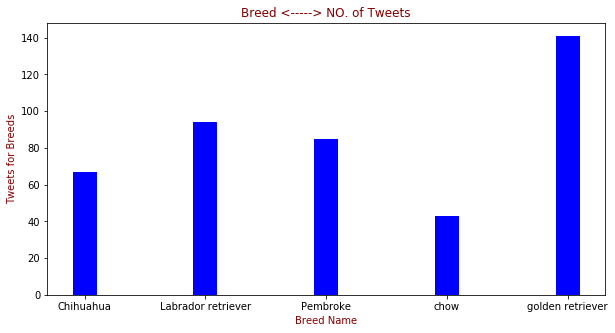

In [66]:
breed_tweets_popular = Analyze_Dataframe.breed[Analyze_Dataframe.breed != 'none'].value_counts().head()

x_axis = list(breed_tweets_popular.index)
y_axis = list(breed_tweets_popular)

fig = plt.figure(figsize = (10, 5))

plt.bar(x_axis, y_axis, color ='blue',
        width = 0.2)
plt.xlabel("Breed Name",color='maroon')
plt.ylabel("Tweets for Breeds",color='maroon')
plt.title("Breed <-----> NO. of Tweets",color='maroon')
plt.show()

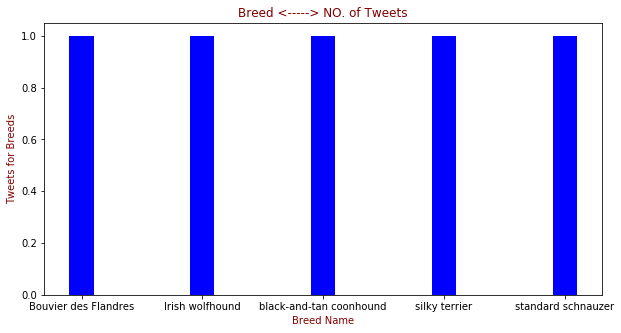

In [67]:
breed_tweets_unpopular = Analyze_Dataframe.breed[Analyze_Dataframe.breed != 'none'].value_counts().tail()

x_axis = list(breed_tweets_unpopular.index)
y_axis = list(breed_tweets_unpopular)

fig = plt.figure(figsize = (10, 5))

plt.bar(x_axis, y_axis, color ='blue', width = 0.2)
plt.xlabel("Breed Name",color='maroon')
plt.ylabel("Tweets for Breeds",color='maroon')
plt.title("Breed <-----> NO. of Tweets",color='maroon')
plt.show()

## Testing

1. Most Popular Dogs according to the tweet are Golden Retriever, Labrador Retriever, Pembroke, Chihuahua and pug
2. Most Un-Popular Dogs according to the tweet are Bouvier des Flandres, Isish wolfhound, Scotch terrier, dumber and silky terrier with same tweets of 1.

## Define - Tweets for WeRateDogs coming from different channels
## Coding

In [68]:
Analyze_Dataframe.source.value_counts()

Twitter for iPhone    1464
Twitter Web Client      16
TweetDeck                8
Name: source, dtype: int64

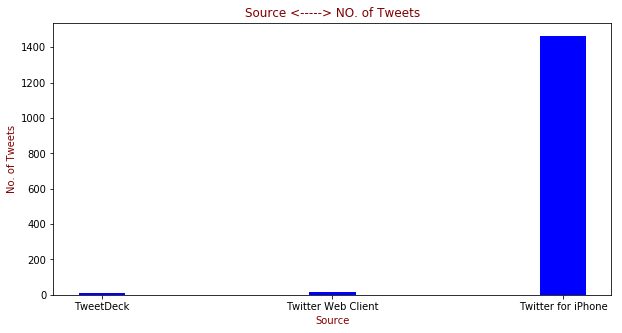

In [69]:
tweet_source = Analyze_Dataframe.source.value_counts()
x_axis = list(tweet_source.index)
y_axis = list(tweet_source)

fig = plt.figure(figsize = (10, 5))

plt.bar(x_axis, y_axis, color ='blue', width = 0.2)
plt.xlabel("Source",color='maroon')
plt.ylabel("No. of Tweets",color='maroon')
plt.title("Source <-----> NO. of Tweets",color='maroon')
plt.show()

## Testing

1. Twitter for iPhone is by largest contributor of tweets to tweeter handle WeRateDogs
2. Then comes Twitter Web Client and TweetDeck

## Define - Top most liked tweets and retweets and it belongs to which Dog
## Coding

In [70]:
print(Analyze_Dataframe[['tweet_id','breed','url']][Analyze_Dataframe.favorite_count == Analyze_Dataframe.favorite_count.max()])
print(Analyze_Dataframe[['tweet_id','breed','url']][Analyze_Dataframe.retweet_count == Analyze_Dataframe.retweet_count.max()])

               tweet_id               breed                      url
720  744234799360020481  Labrador retriever  https://t.co/7wE9LTEXC4
               tweet_id               breed                      url
720  744234799360020481  Labrador retriever  https://t.co/7wE9LTEXC4


## Testing

1. Most liked tweet is 744234799360020481 in Twitter handle WeRateDogs who is a breed of 'Labrador retriever'. One can visit link to see https://t.co/7wE9LTEXC4
2. Also, it has got maximum number of tweets
3. Also, it is not of the same breed (Golden Retriever) who is the most popular breed within this Twitter handle

## Define - Which is the most popular dog type predicted through Predictions file provided
## Coding

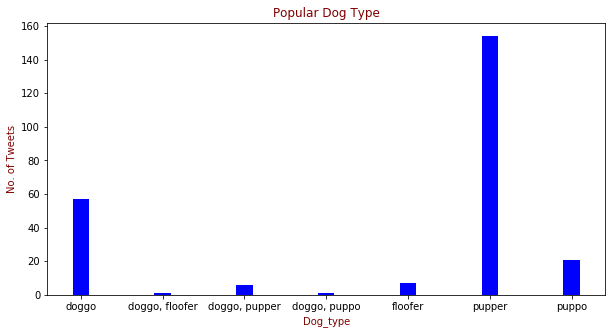

In [71]:
Dog_Type_count = Analyze_Dataframe.Dog_Type[Analyze_Dataframe.Dog_Type != 'none'].value_counts()
x_axis = list(Dog_Type_count.index)
y_axis = list(Dog_Type_count)

fig = plt.figure(figsize = (10, 5))

plt.bar(x_axis, y_axis, color ='blue', width = 0.2)
plt.xlabel("Dog_type",color='maroon')
plt.ylabel("No. of Tweets",color='maroon')
plt.title("Popular Dog Type",color='maroon')
plt.show()

## Testing

Most popular Dog Type is Pupper, then comes doggo, puppo and floofer. There are few multiple values as well for each tweets